In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [ ]:
df = pd.read_csv("airline_data.csv")
df.head()


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0.0,N,0.0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0.0,N,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("Before removing duplicates:", df.shape)
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)


Before removing duplicates: (50286, 30)
After removing duplicates: (50286, 30)


In [ ]:
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
df[delay_cols] = df[delay_cols].fillna(0)
print(df["CarrierDelay"])

0          0.0
1          0.0
2          0.0
3          2.0
4          0.0
         ...  
50281      0.0
50282      0.0
50283     10.0
50284    111.0
50285      0.0
Name: CarrierDelay, Length: 50286, dtype: float64


In [ ]:
print("Rows and Columns:", df.shape)
print("\nColumn Names:\n", df.columns.tolist())
print("\nMissing Values:\n", df.isnull().sum())


Rows and Columns: (50286, 30)

Column Names:
 ['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']

Missing Values:
 Unnamed: 0               0
Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                151
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                  0
ActualElapsedTime      151
CRSElapsedTime           0
AirTime                151
ArrDelay               151
DepDelay                 1
Origin                   1
Dest                     1
Distance             

In [ ]:
df['ArrDelay'].fillna(df['ArrDelay'].median(), inplace=True)
df['ArrTime'].fillna(df['ArrTime'].median(), inplace=True)


/tmp/ipython-input-3001875468.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ArrDelay'].fillna(df['ArrDelay'].median(), inplace=True)
/tmp/ipython-input-3001875468.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

/tmp/ipython-input-2386216514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='Blues',legend=False)


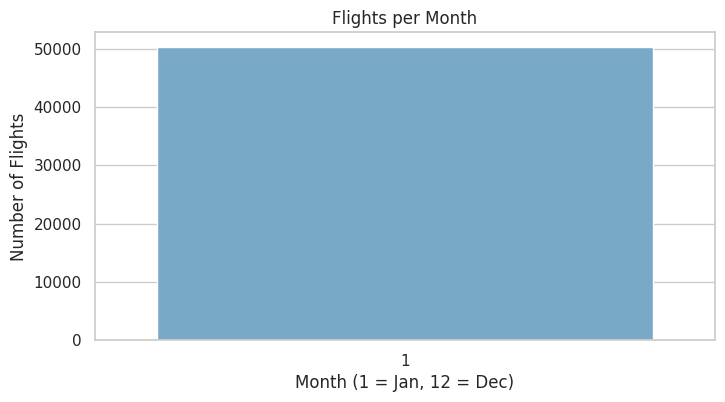

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='Month', data=df, palette='Blues',legend=False)
plt.title("Flights per Month")
plt.xlabel("Month (1 = Jan, 12 = Dec)")
plt.ylabel("Number of Flights")
plt.show()


/tmp/ipython-input-1443266025.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DayOfWeek', data=df, palette='Greens')


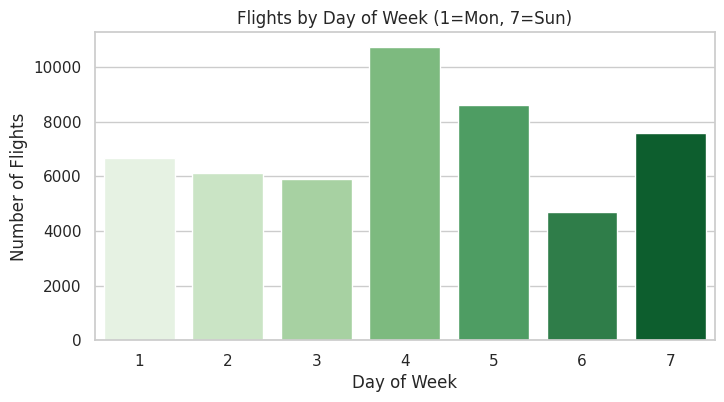

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='DayOfWeek', data=df, palette='Greens')
plt.title("Flights by Day of Week (1=Mon, 7=Sun)")
plt.xlabel("Day of Week")
plt.ylabel("Number of Flights")
plt.show()


/tmp/ipython-input-643524039.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='UniqueCarrier', y='ArrDelay', data=df, estimator=lambda x: x.mean(), palette='viridis')


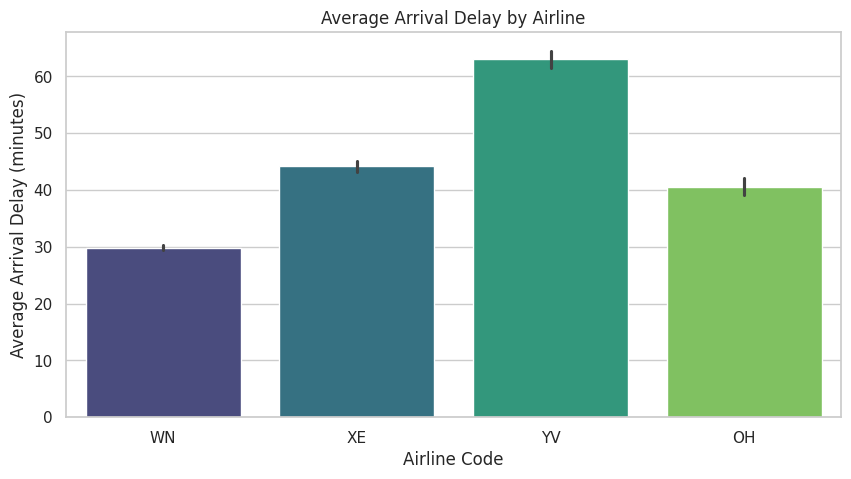

In [ ]:
plt.figure(figsize=(10,5))
sns.barplot(x='UniqueCarrier', y='ArrDelay', data=df, estimator=lambda x: x.mean(), palette='viridis')
plt.title("Average Arrival Delay by Airline")
plt.xlabel("Airline Code")
plt.ylabel("Average Arrival Delay (minutes)")
plt.show()


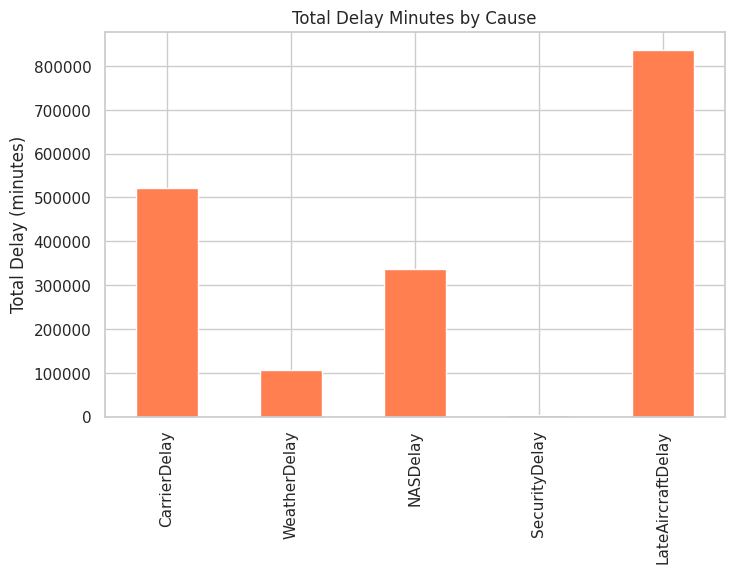

In [ ]:
delay_cols = ['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']
delay_sum = df[delay_cols].sum()

plt.figure(figsize=(8,5))
delay_sum.plot(kind='bar', color='coral')
plt.title("Total Delay Minutes by Cause")
plt.ylabel("Total Delay (minutes)")
plt.show()


/tmp/ipython-input-2351092472.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FlightCount', y=top_routes['Origin'] + "-" + top_routes['Dest'], data=top_routes, palette='cool')


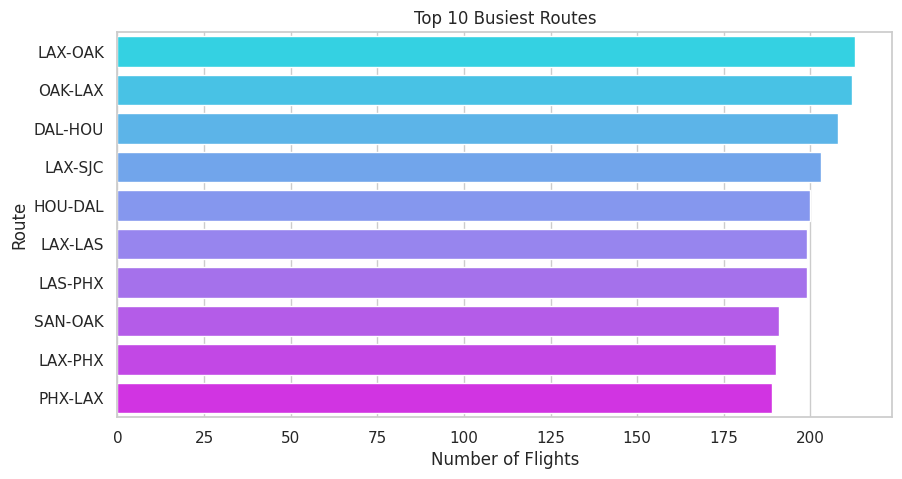

In [ ]:
route = df.groupby(['Origin', 'Dest']).size().reset_index(name='FlightCount')
top_routes = route.sort_values(by='FlightCount', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='FlightCount', y=top_routes['Origin'] + "-" + top_routes['Dest'], data=top_routes, palette='cool')
plt.title("Top 10 Busiest Routes")
plt.xlabel("Number of Flights")
plt.ylabel("Route")
plt.show()


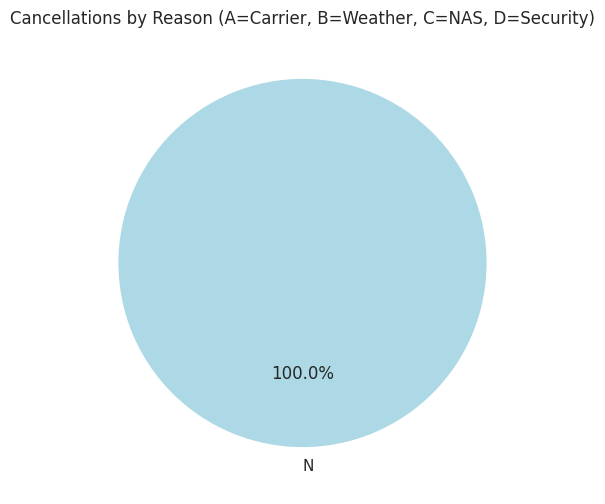

In [ ]:
cancel_reason = df['CancellationCode'].value_counts()

plt.figure(figsize=(6,6))
cancel_reason.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightblue','orange','green','red'])
plt.title("Cancellations by Reason (A=Carrier, B=Weather, C=NAS, D=Security)")
plt.ylabel("")
plt.show()


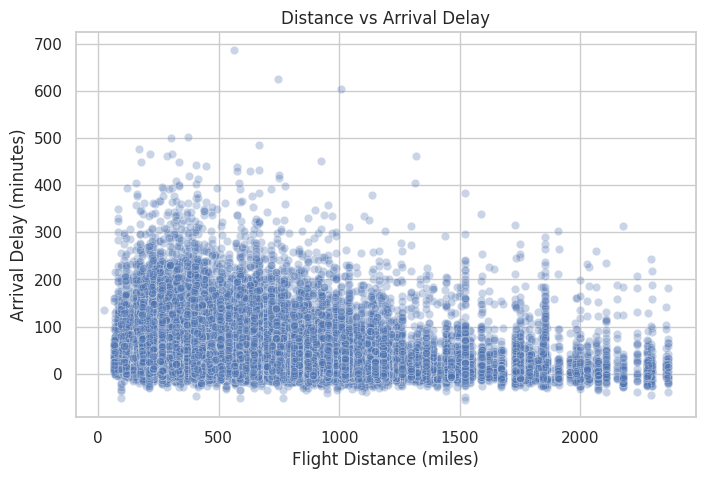

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Distance', y='ArrDelay', data=df, alpha=0.3)
plt.title("Distance vs Arrival Delay")
plt.xlabel("Flight Distance (miles)")
plt.ylabel("Arrival Delay (minutes)")
plt.show()


In [ ]:
def get_season(month):
    if month in [12,1,2]: return 'Winter'
    elif month in [3,4,5]: return 'Spring'
    elif month in [6,7,8]: return 'Summer'
    else: return 'Autumn'

df['Season'] = df['Month'].apply(get_season)


In [ ]:
df['DepHour'] = (df['DepTime'] // 100).astype('Int64')


In [ ]:
df = df[df['ArrDelay'] > -100]  # remove extreme outliers


In [ ]:
import os
os.makedirs("data", exist_ok=True)
df.to_csv("data/final_airfly_cleaned.csv", index=False)
print("Cleaned dataset saved successfully.")


✅ Cleaned dataset saved successfully.
